In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test  / 255.0

x_train.shape

4431872/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [3]:
# The data is only 2D
# Convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,  -1)

x_train.shape

(60000, 28, 28, 1)

In [4]:
# Number of classes
# set data structure, only allowed to contain unique elements
K = len(set(y_train))
print(f'Number of classes: {K}')

Number of classes: 10


In [5]:
# Build the model using the Functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32,  kernel_size=(3, 3), strides=2, activation='relu')(i)
x = Conv2D(filters=64,  kernel_size=(3, 3), strides=2, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(rate=0.2)(x)
x = Dense(units=512, activation='relu')   (x)
x = Dropout(rate=0.2)(x)
x = Dense(units=K,   activation='softmax')(x)

model = Model(i, x)

# Compile & fit
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5147 - accuracy: 0.8092 - val_loss: 0.3904 - val_accuracy: 0.8538
Epoch 2/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3553 - accuracy: 0.8660 - val_loss: 0.3426 - val_accuracy: 0.8742
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3066 - accuracy: 0.8847 - val_loss: 0.3138 - val_accuracy: 0.8801
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2765 - accuracy: 0.8956 - val_loss: 0.2951 - val_accuracy: 0.8901
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2488 - accuracy: 0.9064 - val_loss: 0.2959 - val_accuracy: 0.8913
Epoch 6/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2296 - accuracy: 0.9132 - val_loss: 0.2918 - val_accuracy: 0.8972
Epoch 7/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2119 - accuracy: 0.9199 - val_loss: 0.2867 - val_ac

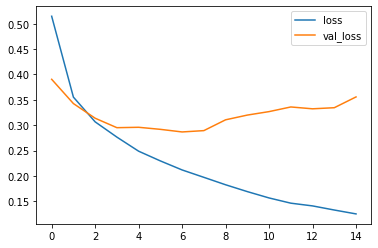

In [6]:
# Loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

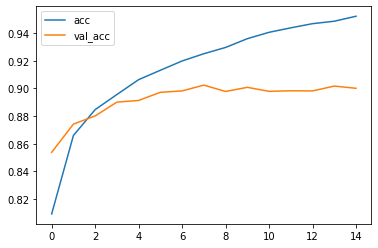

In [7]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[867   1  31  10   4   1  82   0   4   0]
 [  5 972   1  13   3   0   3   1   2   0]
 [ 14   1 902   8  40   0  35   0   0   0]
 [ 18   5  25 887  43   0  19   0   2   1]
 [  1   1  55  17 868   0  56   0   2   0]
 [  1   0   0   2   0 961   0  23   2  11]
 [121   0  94  22 109   0 646   0   8   0]
 [  0   0   0   0   0  11   0 963   0  26]
 [  3   0   4   4   6   1   6   2 973   1]
 [  1   0   0   0   0   3   0  32   2 962]]


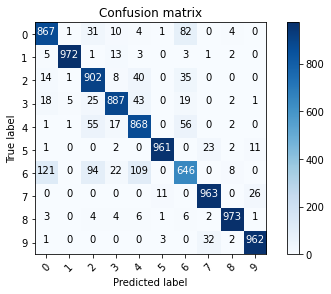

In [8]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [9]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

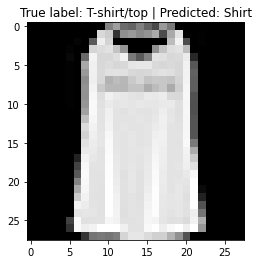

In [10]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title(f'True label: {labels[y_test[i]]} | Predicted: {labels[p_test[i]]}');